[adaptado de [Programa de cursos integrados Aprendizado de máquina](https://www.coursera.org/specializations/machine-learning-introduction) de [Andrew Ng](https://www.coursera.org/instructor/andrewng)  ([Stanford University](http://online.stanford.edu/), [DeepLearning.AI](https://www.deeplearning.ai/) ) ]

In [1]:
# Baixar arquivos adicionais para o laboratório
!wget https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/nn_adv/class_03/Laborat%C3%B3rios/lab_utils_ml_adv_week_3.zip
      
!unzip -n -q lab_utils_ml_adv_week_3.zip

--2024-03-23 13:08:19--  https://github.com/fabiobento/dnn-course-2024-1/raw/main/00_course_folder/nn_adv/class_03/Laborat%C3%B3rios/lab_utils_ml_adv_week_3.zip
Resolving github.com (github.com)... 20.201.28.151
Connecting to github.com (github.com)|20.201.28.151|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-03-23 13:08:19 ERROR 404: Not Found.



In [30]:
# Testar se estamos no Google Colab
# Necessário para ativar widgets
try:
  import google.colab
  IN_COLAB = True
  from google.colab import output
  output.enable_custom_widget_manager()
except:
  IN_COLAB = False

# Avaliação e Seleção de Modelos

Quantificar o desempenho de um algoritmo de aprendizado e comparar diferentes modelos são algumas das tarefas comuns ao aplicar o aprendizado de máquina ao mundo real.

Neste laboratório, você praticará essas tarefas usando as dicas compartilhadas em sala de aula. Especificamente, você irá:

* dividir os conjuntos de dados em conjuntos de treinamento, validação cruzada e teste
* avaliar modelos de regressão e classificação
* adicionar recursos polinomiais para melhorar o desempenho de um modelo de regressão linear
* comparar várias arquiteturas de redes neurais

Este laboratório também o ajudará a se familiarizar com o código que você verá na atividade avaliativa do tópico "Boas Práticas durante o Treino e Avaliação de Redes Neurais". Vamos começar!

## Importações e configuração do laboratório

Primeiro, você importará os pacotes necessários para as tarefas deste laboratório. Também foram incluídos alguns comandos para tornar os resultados mais legíveis posteriormente, reduzindo a verbosidade e suprimindo avisos não críticos.

In [31]:
# para cálculos de matrizes e carregamento de dados
import numpy as np

# para criar modelos de regressão linear e preparar dados
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# para criar e treinar redes neurais
import tensorflow as tf

# funções personalizadas
import utils

# Reduzir a precisão da exibição em matrizes numéricas
np.set_printoptions(precision=2)

# suprimir avisos
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

## Regressão

Primeiro, você terá a tarefa de desenvolver um modelo para um problema de regressão. Você recebeu o conjunto de dados abaixo, que consiste em 50 exemplos de um recurso de entrada `x` e seu alvo correspondente `y`.

In [4]:
# Carregar o conjunto de dados do arquivo de texto
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

# Dividir as entradas e saídas em matrizes separadas
x = data[:,0]
y = data[:,1]

# Converta matrizes 1-D em 2-D porque os comandos posteriores exigirão isso
x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"o formato da entrada x é: {x.shape}")
print(f"o formato dos alvos y é: {y.shape}")

o formato da entrada x é: (50, 1)
o formato dos alvos y é: (50, 1)


Você pode plotar o conjunto de dados para ter uma ideia de como o alvo se comporta em relação à entrada. Caso queira inspecionar o código, você pode encontrar a função `plot_dataset()` no arquivo `utils.py` fora deste notebook.

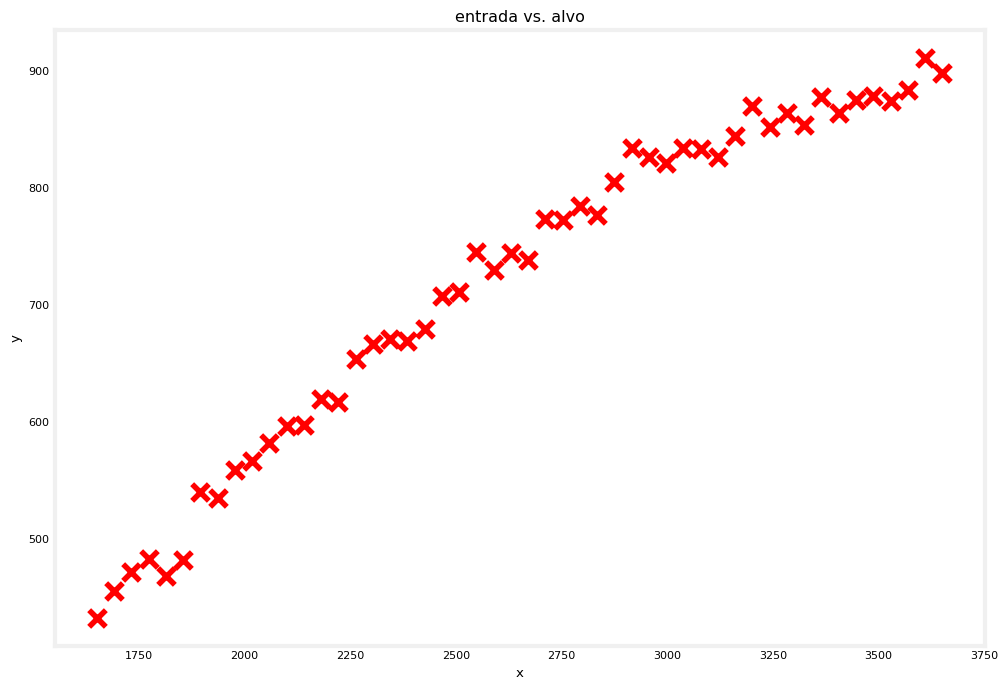

In [5]:
# Plotar todo o conjunto de dados
utils.plot_dataset(x=x, y=y, title="entrada vs. alvo")

## Dividir o conjunto de dados em conjuntos de treinamento, validação cruzada e teste

Em laboratórios anteriores, você pode ter usado todo o conjunto de dados para treinar seus modelos. Na prática, entretanto, é melhor reter uma parte dos dados para medir a capacidade de generalização do modelo para novos exemplos. Isso permitirá que você saiba se o modelo se ajustou demais ao conjunto de treinamento (_overfitting_).

Conforme mencionado na aula, é comum dividir seus dados em três partes:

* ***conjunto de treinamento*** - usado para treinar o modelo
* ***conjunto de validação cruzada (também chamado de validação, desenvolvimento ou conjunto dev)*** - usado para avaliar as diferentes configurações de modelo que você está escolhendo. Por exemplo, você pode usá-lo para tomar uma decisão sobre quais recursos polinomiais devem ser adicionados ao conjunto de dados.
* ***conjunto de teste*** - usado para fornecer uma estimativa justa do desempenho do modelo escolhido em relação a novos exemplos. Isso não deve ser usado para tomar decisões enquanto você ainda estiver desenvolvendo os modelos.

O Scikit-learn fornece uma função [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) para dividir seus dados nas partes mencionadas acima. Na célula de código abaixo, você dividirá o conjunto de dados inteiro em 60% de treinamento, 20% de validação cruzada e 20% de teste.

In [6]:
# Obtenha 60% do conjunto de dados como o conjunto de treinamento.
# Coloque os 40% restantes em variáveis temporárias: x_ e y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Dividir o subconjunto de 40% acima em dois:
# uma metade para validação cruzada e a outra para o conjunto de teste
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Excluir variáveis temporárias
del x_, y_

print(f"o formato do conjunto de treino (entrada) é: {x_train.shape}")
print(f"o formato do conjunto de treino (alvo) é: {y_train.shape}\n")
print(f"o formato do conjunto de validação cruzada (entrada) é: {x_cv.shape}")
print(f"o formato do conjunto de validação cruzada (alvo) é: {y_cv.shape}\n")
print(f"o formato do conjunto de teste (entrada) é: {x_test.shape}")
print(f"o formato do conjunto de teste (alvo) é: {y_test.shape}")

o formato do conjunto de treino (entrada) é: (30, 1)
o formato do conjunto de treino (alvo) é: (30, 1)

o formato do conjunto de validação cruzada (entrada) é: (10, 1)
o formato do conjunto de validação cruzada (alvo) é: (10, 1)

o formato do conjunto de teste (entrada) é: (10, 1)
o formato do conjunto de teste (alvo) é: (10, 1)


Você pode plotar o conjunto de dados novamente abaixo para ver quais pontos foram usados como dados de treinamento, validação cruzada ou teste.

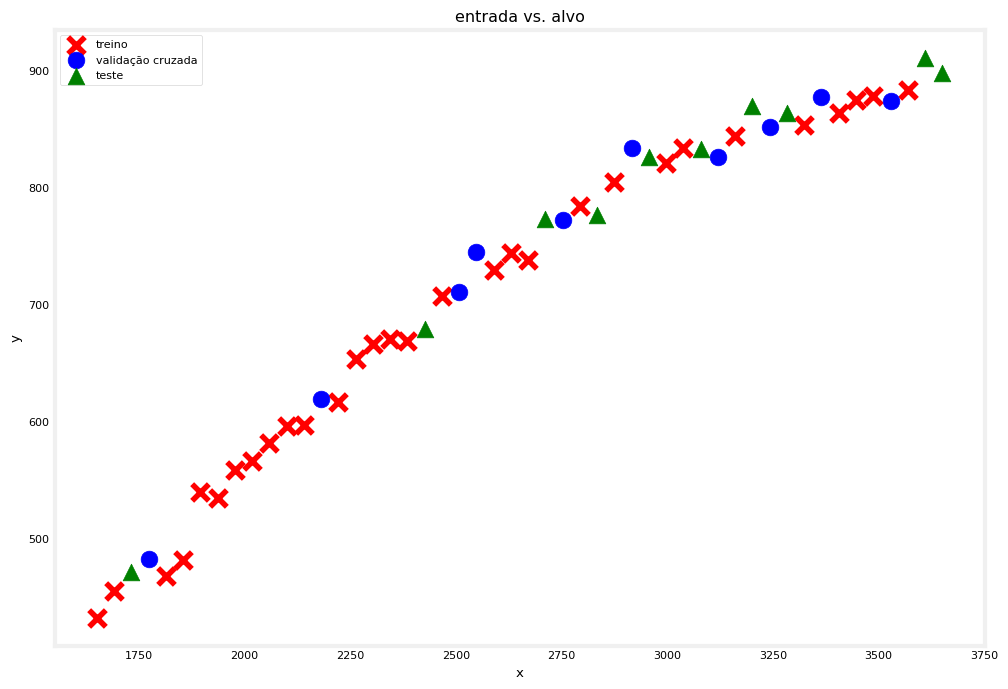

In [7]:
utils.plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs. target")

## Ajustar um modelo linear

Agora que você dividiu os dados, uma das primeiras coisas que pode tentar é ajustar um modelo linear. Isso será feito nas próximas seções abaixo.

### Feature scaling
Anteriormente você viu que geralmente é uma boa ideia realizar o _feature scaling_ para ajudar o modelo a convergir mais rapidamente. Isso é especialmente verdadeiro se os recursos de entrada tiverem faixas de valores muito diferentes. 

Mais adiante neste laboratório, você adicionará termos polinomiais para que os recursos de entrada tenham, de fato, intervalos diferentes. Por exemplo, $x$ varia de aproximadamente 1600 a 3600, enquanto $x^2$ varia de 2,56 milhões a 12,96 milhões. 

Você usará apenas $x$ para esse primeiro modelo, mas é bom praticar o dimensionamento de recursos agora para poder aplicá-lo mais tarde. Para isso, você usará a classe [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) do scikit-learn. Ele calcula o _z-score_ de suas entradas.

Para relembrar, o _z-score_ é dado pela _equação:
_

$$ z = \frac{x - \mu}{\sigma} $$

em que $\mu$ é a média dos valores dos recursos e $\sigma$ é o desvio padrão.

O código abaixo mostra como preparar o conjunto de treinamento usando a classe mencionada. Você pode plotar os resultados novamente para inspecionar se eles ainda seguem o mesmo padrão de antes. O novo gráfico deve ter um intervalo reduzido de valores para `x`.

Média computada do conjunto de treinamento: 2504.06
Desvio padrão calculado do conjunto de treinamento: 574.85


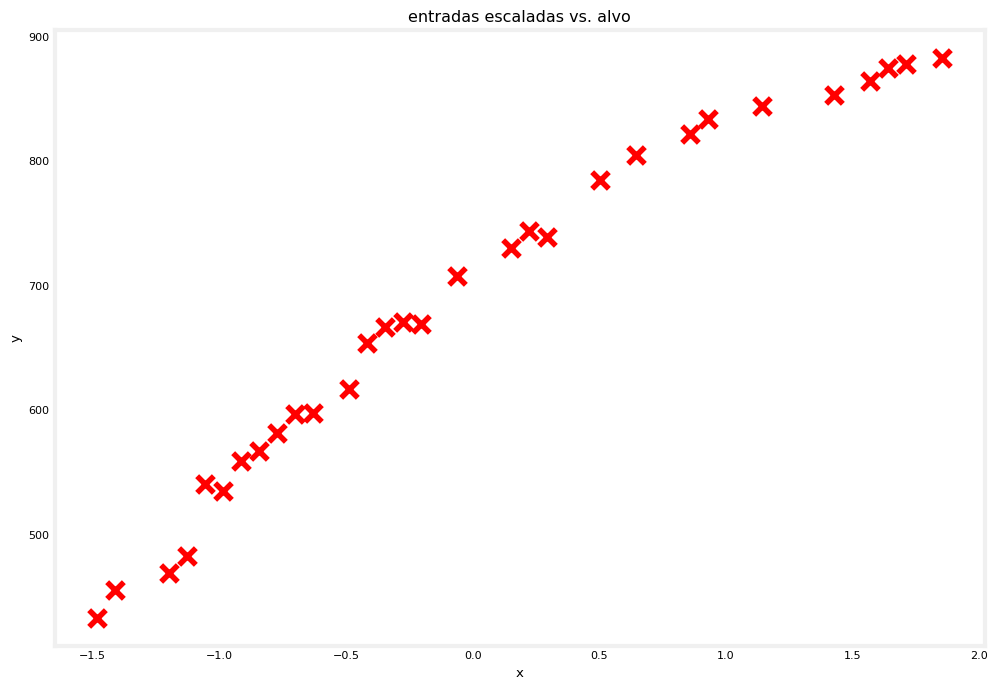

In [33]:
# Inicializar a classe
scaler_linear = StandardScaler()

# Calcule a média e o desvio padrão do conjunto de treinamento e, em seguida, transforme-o
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Média computada do conjunto de treinamento: {scaler_linear.mean_.squeeze():.2f}")
print(f"Desvio padrão calculado do conjunto de treinamento: {scaler_linear.scale_.squeeze():.2f}")

# Plot the results
utils.plot_dataset(x=X_train_scaled, y=y_train, title="entradas escaladas vs. alvo")

### Treinar o modelo

Em seguida, você criará e treinará um modelo de regressão. Para este laboratório, você usará a classe [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), mas observe que há outros [linear regressors](https://scikit-learn.org/stable/modules/classes.html#classical-linear-regressors) que também podem ser usados.

In [34]:
# Inicializar a classe
linear_model = LinearRegression()

# Treinar o modelo
linear_model.fit(X_train_scaled, y_train )

LinearRegression()

### Avaliar o modelo

Para avaliar o desempenho do seu modelo, você medirá o erro dos conjuntos de treinamento e validação cruzada. Para o erro de treinamento, lembre-se da equação para calcular o erro quadrático médio (MSE):

$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{train}^{(i)}) - y_{train}^{(i)})^2\right]$$

O Scikit-learn também tem uma função interna [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) que você pode usar. Observe, porém, que [de acordo com a documentação](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), a implementação do scikit-learn divide apenas por `m` e não por `2*m`, em que `m` é o número de exemplos. Conforme mencionado anteriormente(aulas sobre a função de custo), a divisão por `2m` é uma convenção que seguiremos, mas os cálculos ainda devem funcionar independentemente de você incluí-la ou não. Portanto, para corresponder à equação acima, você pode usar a função scikit-learn e dividir por 2, conforme mostrado abaixo. Também foi incluída uma implementação de loop-for para que você possa verificar se é igual. 

Outro aspecto a ser observado: como você treinou o modelo em valores escalonados (ou seja, usando o _z-score_), você também deve alimentar o conjunto de treinamento escalonado em vez de seus valores brutos.

In [36]:
# Alimente o conjunto de treinamento dimensionado e obtenha as previsões
yhat = linear_model.predict(X_train_scaled)

# Use a função do scikit-learn e divida por 2
print(f"MSE de treino (usando a função do sklearn): {mean_squared_error(y_train, yhat) / 2}")

# Implementação do for-loop
total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y_train[i])**2
    total_squared_error += squared_error_i                                              

mse = total_squared_error / (2*len(yhat))

print(f"treinamento MSE (implementação loop-for): {mse.squeeze()}")

MSE de treino (usando a função do sklearn): 406.19374192533127
treinamento MSE (implementação loop-for): 406.19374192533127


Em seguida, você pode calcular o MSE para o conjunto de validação cruzada basicamente com a mesma equação:

$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$

Assim como no conjunto de treinamento, você também deverá dimensionar o conjunto de validação cruzada. Um aspecto *importante* a ser observado ao usar o _z-score_ é que você deve usar a média e o desvio padrão do **conjunto de treinamento** ao escalar o conjunto de validação cruzada. Isso serve para garantir que seus recursos de entrada sejam transformados conforme o esperado pelo modelo. Uma maneira de obter intuição é com este cenário:

* Digamos que seu conjunto de treinamento tenha um recurso de entrada igual a "500", que é reduzido para "0,5" usando o _z-score_.
* Após o treinamento, seu modelo é capaz de mapear com precisão essa entrada escalonada `x=0,5` para a saída de destino `y=300`. 
* Agora, digamos que você tenha implantado esse modelo e um dos seus usuários tenha fornecido uma amostra igual a 500. 
* Se você obtiver o z-score dessa amostra de entrada usando qualquer outro valor da média e do desvio padrão, ele poderá não ser dimensionado para `0,5` e seu modelo provavelmente fará uma previsão errada (ou seja, não será igual a `y=300`). 



Você dimensionará o conjunto de validação cruzada abaixo usando o mesmo `StandardScaler` usado anteriormente, mas apenas chamando o método [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) em vez de [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform).

In [38]:
# Dimensione o conjunto de validação cruzada usando a média e o desvio padrão do conjunto de treinamento
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Média usada para escalar o conjunto de VC: {scaler_linear.mean_.squeeze():.2f}")
print(f"Desvio padrão usado para dimensionar o conjunto de VC: {scaler_linear.scale_.squeeze():.2f}")

# Alimentar o conjunto de validação cruzada escalonada
yhat = linear_model.predict(X_cv_scaled)

# Use a função de utilidade do scikit-learn e divida por 2
print(f"MSE de validação cruzada: {mean_squared_error(y_cv, yhat) / 2}")

Média usada para escalar o conjunto de VC: 2504.06
Desvio padrão usado para dimensionar o conjunto de VC: 574.85
MSE de validação cruzada: 551.7789026952216


## Adição de recursos polinomiais

Nos gráficos anteriores, você deve ter notado que o alvo `y` aumenta mais acentuadamente em valores menores de `x` em comparação com os maiores. Uma linha reta pode não ser a melhor escolha porque o alvo `y` parece se achatar à medida que `x` aumenta. Agora que você tem esses valores de MSE de treinamento e validação cruzada do modelo linear, pode tentar adicionar recursos polinomiais para ver se consegue obter um desempenho melhor. O código será basicamente o mesmo, mas com algumas etapas extras de pré-processamento. Vamos ver isso a seguir.

### Criar os recursos adicionais

Primeiro, você gerará os recursos polinomiais do seu conjunto de treinamento. O código abaixo demonstra como fazer isso usando a classe [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html). Ele criará um novo recurso de entrada que tem os valores ao quadrado da entrada `x` (ou seja, grau=2).

In [40]:
# Instanciar a classe para criar recursos polinomiais
poly = PolynomialFeatures(degree=2, include_bias=False)

# Calcular o número de recursos e transformar o conjunto de treinamento
X_train_mapped = poly.fit_transform(x_train)

# Visualize os primeiros 5 elementos do novo conjunto de treinamento. A coluna da esquerda é `x` e a da direita é `x^2`
# Observação: o `e+<número>` na saída indica quantas casas o ponto decimal deve 
# ser movido. Por exemplo, `3.24e+03` é igual a `3240`
print(X_train_mapped[:5])

[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


Em seguida, você dimensionará as entradas como antes para restringir o intervalo de valores.

In [42]:
# Instanciar a classe
scaler_poly = StandardScaler()

# Calcule a média e o desvio padrão do conjunto de treinamento e, em seguida, transforme-o
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Visualize os primeiros 5 elementos do conjunto de treinamento escalado.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


Em seguida, você pode prosseguir com o treinamento do modelo. Depois disso, você medirá o desempenho do modelo em relação ao conjunto de validação cruzada. Como antes, você deve se certificar de realizar as mesmas transformações que fez no conjunto de treinamento. Você adicionará o mesmo número de recursos polinomiais e dimensionará o intervalo de valores.

In [44]:
# Inicializar a classe
model = LinearRegression()

# Treinar o modelo
model.fit(X_train_mapped_scaled, y_train )

# Calcular o MSE de treinamento
yhat = model.predict(X_train_mapped_scaled)
print(f"MSE de treino: {mean_squared_error(y_train, yhat) / 2}")

# Adicionar os recursos polinomiais ao conjunto de validação cruzada
X_cv_mapped = poly.transform(x_cv)

# Dimensionar o conjunto de validação cruzada usando a média e o desvio padrão do conjunto de treinamento
X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

# Calcular a validação cruzada MSE
yhat = model.predict(X_cv_mapped_scaled)
print(f"MSE de validação cruzada: {mean_squared_error(y_cv, yhat) / 2}")

MSE de treino: 49.11160933402504
MSE de validação cruzada: 87.69841211111934


Você notará que os MSEs são significativamente melhores tanto para o conjunto de treino quanto para o conjunto de validação cruzada quando você adicionou o polinômio de 2ª ordem. É possível que você queira introduzir mais termos polinomiais e ver qual deles apresenta o melhor desempenho. Conforme mostrado na aula, você pode ter 10 modelos diferentes como este:

<img src='images/C2_W3_poly.png' width=50%>

Você pode criar um loop que contenha todas as etapas das células de código anteriores. Aqui está uma implementação que adiciona recursos polinomiais de até grau = 10. Vamos plotá-la no final para facilitar a comparação dos resultados de cada modelo.

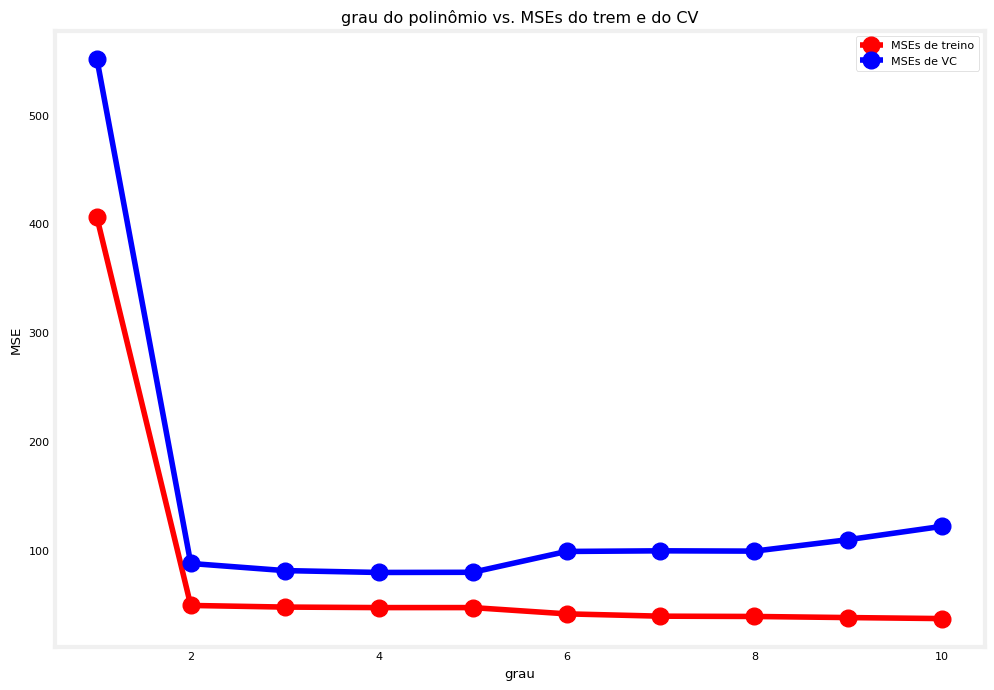

In [45]:
# Inicializar listas para salvar os erros, os modelos e as transformações de recursos
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

# Faça um loop de 10 vezes. Cada vez adicionando mais um grau de polinômio maior que o anterior.
for degree in range(1,11):
    
    # Adicionar recursos polinomiais ao conjunto de treinamento
    poly = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    polys.append(poly)
    
    # Escalar o conjunto de treinamento
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)
    
    # Criar e treinar o modelo
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train )
    models.append(model)
    
    # Calcular o MSE de treinamento
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)
    
    # Adicionar recursos polinomiais e dimensionar o conjunto de validação cruzada
    X_cv_mapped = poly.transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)
    
    # Calcular a validação cruzada MSE
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
    
# Plotar os resultados
degrees=range(1,11)
utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="grau do polinômio vs. MSEs do trem e do CV")

### Choosing the best model

When selecting a model, you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting. If you used the defaults in this lab, you will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5. After that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model with the lowest `cv_mse` as the one best suited for your application.

In [16]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


You can then publish the generalization error by computing the test set's MSE. As usual, you should transform this data the same way you did with the training and cross validation sets.

In [17]:
# Add polynomial features to the test set
X_test_mapped = polys[degree-1].transform(x_test)

# Scale the test set
X_test_mapped_scaled = scalers[degree-1].transform(X_test_mapped)

# Compute the test MSE
yhat = models[degree-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {cv_mses[degree-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test MSE: 104.63


## Neural Networks

The same model selection process can also be used when choosing between different neural network architectures. In this section, you will create the models shown below and apply it to the same regression task above.

<img src='images/C2_W3_NN_Arch.png' width=40%>

### Prepare the Data

You will use the same training, cross validation, and test sets you generated in the previous section. From earlier lectures in this course, you may have known that neural networks can learn non-linear relationships so you can opt to skip adding polynomial features. The code is still included below in case you want to try later and see what effect it will have on your results. The default `degree` is set to `1` to indicate that it will just use `x_train`, `x_cv`, and `x_test` as is (i.e. without any additional polynomial features).

In [18]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

Next, you will scale the input features to help gradient descent converge faster. Again, notice that you are using the mean and standard deviation computed from the training set by just using `transform()` in the cross validation and test sets instead of `fit_transform()`.

In [19]:
# Scale the features using the z-score
scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)

### Build and train the models

You will then create the neural network architectures shown earlier. The code is provided in the `build_models()` function in the `utils.py` file in case you want to inspect or modify it. You will use that in the loop below then proceed to train the models. For each model, you will also record the training and cross validation errors.

In [20]:
# Initialize lists that will contain the errors for each model
nn_train_mses = []
nn_cv_mses = []

# Build the models
nn_models = utils.build_models()

# Loop over the the models
for model in nn_models:
    
    # Setup the loss and optimizer
    model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    )

    print(f"Training {model.name}...")
    
    # Train the model
    model.fit(
        X_train_mapped_scaled, y_train,
        epochs=300,
        verbose=0
    )
    
    print("Done!\n")

    
    # Record the training MSEs
    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)
    
    # Record the cross validation MSEs 
    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

2024-03-23 13:08:22.081705: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 13:08:22.098850: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-23 13:08:22.098978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Training model_1...


2024-03-23 13:08:23.057494: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x797e541fbdd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-23 13:08:23.057514: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2080 SUPER, Compute Capability 7.5
2024-03-23 13:08:23.062937: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-23 13:08:23.087509: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8600
2024-03-23 13:08:23.146477: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Done!

1/1 [==============================] - 0s 15ms/step
Training model_2...
Done!

1/1 [==============================] - 0s 11ms/step
Training model_3...
Done!

1/1 [==============================] - 0s 11ms/step
RESULTS:
Model 1: Training MSE: 406.19, CV MSE: 551.78
Model 2: Training MSE: 69.46, CV MSE: 84.45
Model 3: Training MSE: 73.41, CV MSE: 111.43


From the recorded errors, you can decide which is the best model for your application. Look at the results above and see if you agree with the selected `model_num` below. Finally, you will compute the test error to estimate how well it generalizes to new examples.

In [21]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = nn_models[model_num-1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

1/1 [==============================] - 0s 11ms/step
Selected Model: 3
Training MSE: 73.41
Cross Validation MSE: 111.43
Test MSE: 131.44


## Classification

In this last part of the lab, you will practice model evaluation and selection on a classification task. The process will be similar, with the main difference being the computation of the errors. You will see that in the following sections.

### Load the Dataset

First, you will load a dataset for a binary classification task. It has 200 examples of two input features (`x1` and `x2`), and a target `y` of either `0` or `1`.

In [22]:
# Load the dataset from a text file
data = np.loadtxt('./data/data_w3_ex2.csv', delimiter=',')

# Split the inputs and outputs into separate arrays
x_bc = data[:,:-1]
y_bc = data[:,-1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of the inputs x is: {x_bc.shape}")
print(f"the shape of the targets y is: {y_bc.shape}")

the shape of the inputs x is: (200, 2)
the shape of the targets y is: (200, 1)


You can plot the dataset to examine how the examples are separated.

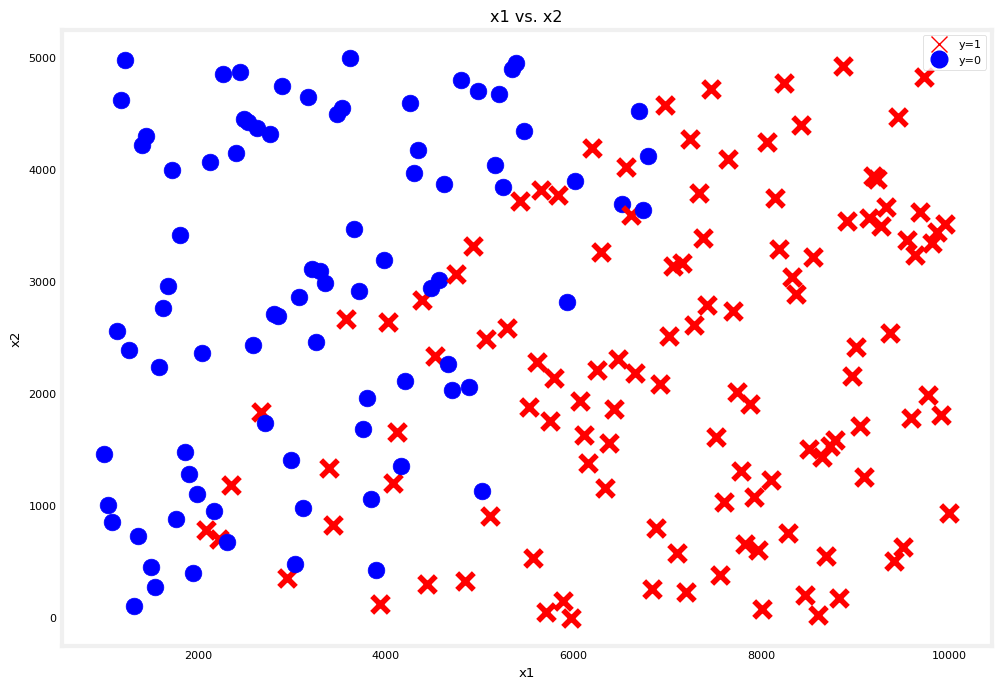

In [23]:
utils.plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2")

### Split and prepare the dataset

Next, you will generate the training, cross validation, and test sets. You will use the same 60/20/20 proportions as before. You will also scale the features as you did in the previous section.

In [24]:
from sklearn.model_selection import train_test_split

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [25]:
# Scale the features

# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

### Evaluating the error for classification models

In the previous sections on regression models, you used the mean squared error to measure how well your model is doing. For classification, you can get a similar metric by getting the fraction of the data that the model has misclassified. For example, if your model made wrong predictions for 2 samples out of 5, then you will report an error of `40%` or `0.4`. The code below demonstrates this using a for-loop and also with Numpy's [`mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) function. 

In [26]:
# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

# Apply a threshold to the model output. If greater than 0.5, set to 1. Else 0.
predictions = np.where(probabilities >= 0.5, 1, 0)

# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

# Get number of predictions
num_predictions = len(predictions)

# Loop over each prediction
for i in range(num_predictions):
    
    # Check if it matches the ground truth
    if predictions[i] != ground_truth[i]:
        
        # Add one to the counter if the prediction is wrong
        misclassified += 1

# Compute the fraction of the data that the model misclassified
fraction_error = misclassified/num_predictions

print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


### Build and train the model

You will use the same neural network architectures in the previous section so you can call the `build_models()` function again to create new instances of these models. 

You will follow the recommended approach mentioned last week where you use a `linear` activation for the output layer (instead of `sigmoid`) then set `from_logits=True` when declaring the loss function of the model. You will use the [binary crossentropy loss](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) because this is a binary classification problem.

After training, you will use a [sigmoid function](https://www.tensorflow.org/api_docs/python/tf/math/sigmoid) to convert the model outputs into probabilities. From there, you can set a threshold and get the fraction of misclassified examples from the training and cross validation sets.

You can see all these in the code cell below.

In [27]:
# Initialize lists that will contain the errors for each model
nn_train_error = []
nn_cv_error = []

# Build the models
models_bc = utils.build_models()

# Loop over each model
for model in models_bc:
    
    # Setup the loss and optimizer
    model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    )

    print(f"Training {model.name}...")

    # Train the model
    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )
    
    print("Done!\n")
    
    # Set the threshold for classification
    threshold = 0.5
    
    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error = np.mean(yhat != y_bc_train)
    nn_train_error.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(x_bc_cv_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    cv_error = np.mean(yhat != y_bc_cv)
    nn_cv_error.append(cv_error)

# Print the result
for model_num in range(len(nn_train_error)):
    print(
        f"Model {model_num+1}: Training Set Classification Error: {nn_train_error[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_cv_error[model_num]:.5f}"
        )

Training model_1...
Done!

2/2 [==============================] - 0s 1ms/step
Training model_2...
Done!

2/2 [==============================] - 0s 1ms/step
Training model_3...
Done!

2/2 [==============================] - 0s 1ms/step
Model 1: Training Set Classification Error: 0.08333, CV Set Classification Error: 0.15000
Model 2: Training Set Classification Error: 0.05000, CV Set Classification Error: 0.20000
Model 3: Training Set Classification Error: 0.05000, CV Set Classification Error: 0.22500


From the output above, you can choose which one performed best. If there is a tie on the cross validation set error, then you can add another criteria to break it. For example, you can choose the one with a lower training error. A more common approach is to choose the smaller model because it saves computational resources. In our example, Model 1 is the smallest and Model 3 is the largest.

Finally, you can compute the test error to report the model's generalization error.

In [28]:
# Select the model with the lowest error
model_num = 3

# Compute the test error
yhat = models_bc[model_num-1].predict(x_bc_test_scaled)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_error[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_cv_error[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_error:.4f}")

2/2 [==============================] - 0s 2ms/step
Selected Model: 3
Training Set Classification Error: 0.0500
CV Set Classification Error: 0.2250
Test Set Classification Error: 0.1250


## Wrap Up

In this lab, you practiced evaluating a model's performance and choosing between different model configurations. You split your datasets into training, cross validation, and test sets and saw how each of these are used in machine learning applications. In the next section of the course, you will see more tips on how to improve your models by diagnosing bias and variance. Keep it up!